[View in Colaboratory](https://colab.research.google.com/github/stanimman/Simple/blob/master/Hello,_Colaboratory.ipynb)

## Welcome to Colaboratory!

Colaboratory is a Google research project created to help disseminate machine learning education and research. It's a Jupyter notebook environment that requires no setup to use and runs entirely in the cloud.

Colaboratory notebooks are stored in [Google Drive](https://drive.google.com) and can be shared just as you would with Google Docs or Sheets. Colaboratory is free to use.

For more information, see our [FAQ](https://research.google.com/colaboratory/faq.html).

## Seedbank

Looking for Colab notebooks to learn from? Check out [Seedbank](https://tools.google.com/seedbank/), a place to discover interactive machine learning examples.

## Local runtime support

Colab also supports connecting to a Jupyter runtime on your local machine. For more information, see our [documentation](https://research.google.com/colaboratory/local-runtimes.html).

## Python 3

Colaboratory supports both Python2 and Python3 for code execution. 

* When creating a new notebook, you'll have the choice between Python 2 and Python 3.
* You can also change the language associated with a notebook; this information will be written into the `.ipynb` file itself, and thus will be preserved for future sessions.

In [1]:
!wget https://fs7.transfernow.net/download/5b4b0c4045c8d/master/MURA-v1.1.zip

--2018-07-20 08:17:26--  https://fs7.transfernow.net/download/5b4b0c4045c8d/master/MURA-v1.1.zip
Resolving fs7.transfernow.net (fs7.transfernow.net)... 163.172.21.18
Connecting to fs7.transfernow.net (fs7.transfernow.net)|163.172.21.18|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 383652532 (366M) [application/zip]
Saving to: ‘MURA-v1.1.zip’

MURA-v1.1.zip        53%[=========>          ] 194.66M  3.79MB/s    eta 41s    

MURA-v1.1.zip       100%[===================>] 365.88M  4.67MB/s    in 89s     

2018-07-20 08:18:55 (4.11 MB/s) - ‘MURA-v1.1.zip’ saved [383652532/383652532]



In [2]:
!pip uninstall Pillow -y

!pip install Pillow

Uninstalling Pillow-4.0.0:
  Successfully uninstalled Pillow-4.0.0
    100% |████████████████████████████████| 2.0MB 13.4MB/s 


In [1]:
import PIL
print(PIL.PILLOW_VERSION)

from os import path
from wheel.pep425tags import get_abbr_impl, get_impl_ver, get_abi_tag
platform = '{}{}-{}'.format(get_abbr_impl(), get_impl_ver(), get_abi_tag())

accelerator = 'cu80' if path.exists('/opt/bin/nvidia-smi') else 'cpu'

!pip install -q http://download.pytorch.org/whl/{accelerator}/torch-0.4.0-{platform}-linux_x86_64.whl torchvision
import torch
print(torch.__version__)
print(torch.cuda.is_available())

import torch 
import torchvision
import torch.nn as nn
import numpy as np
import torchvision.transforms as transforms

from torch.utils.data import DataLoader, Dataset
from torchvision.datasets.folder import pil_loader
from torchvision import transforms, utils
import pandas as pd
import matplotlib.pyplot as plt
from skimage import io, transform
import matplotlib.pyplot as plt
import os
from torchvision import  models
import torch.nn as nn
import torch.optim as optim
import copy
from torch.optim import lr_scheduler
import time
import datetime as dt
from PIL import Image


5.2.0
tcmalloc: large alloc 1073750016 bytes == 0x5b7c8000 @  0x7f61af4871c4 0x46d6a4 0x5fcbcc 0x4c494d 0x54f3c4 0x553aaf 0x54e4c8 0x54f4f6 0x553aaf 0x54efc1 0x54f24d 0x553aaf 0x54efc1 0x54f24d 0x553aaf 0x54efc1 0x54f24d 0x551ee0 0x54e4c8 0x54f4f6 0x553aaf 0x54efc1 0x54f24d 0x551ee0 0x54efc1 0x54f24d 0x551ee0 0x54e4c8 0x54f4f6 0x553aaf 0x54e4c8
0.4.0
True


In [0]:
%%capture
!unzip MURA-v1.1.zip
train_path_df = pd.read_csv('MURA-v1.1/train/train_XR_FINGER.csv')
valid_path_df = pd.read_csv('MURA-v1.1/valid/valid_XR_FINGER.csv')

In [0]:
class MuraImageDataset(Dataset):
    """Mura dataset."""
    def __init__(self, df, root_dir, transform=None):
        """
        Args:
            df (dataframe): Path to the image file with annotations.
            root_dir (string): Directory with all the images.
            transform (callable, optional): Optional transform to be applied
                on a sample.
        """
        self.df = df
        self.root_dir = root_dir
        self.transform = transform
    def __len__(self):
        return len(self.df)
    def __getitem__(self, idx):
        img_name = os.path.join(self.root_dir,
                                self.df.iloc[idx, 0])
        #print(img_name)
        image = pil_loader(img_name)
        labels = self.df.iloc[idx, 2]
        labels = labels.astype('float')
        if self.transform:
            image = self.transform(image)
        return [image, labels]

transformed_train_dataset = MuraImageDataset(df=train_path_df,
                                    root_dir='/content',
                                    transform=transforms.Compose([
                                               #transforms.ToPILImage(),
                                               transforms.RandomRotation(10),
                                               #transforms.Resize(224),
                                               transforms.CenterCrop(224),
                                               transforms.RandomHorizontalFlip(),
                                               transforms.ToTensor(),
                                               transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
                                               
                                           ]))
transformed_valid_dataset = MuraImageDataset(df=valid_path_df,
                                    root_dir='/content',
                                    transform=transforms.Compose([
                                               #transforms.ToPILImage(),
                                               transforms.RandomRotation(10),
                                               #transforms.Resize(224),
                                               transforms.CenterCrop(224),
                                               transforms.RandomHorizontalFlip(),
                                               transforms.ToTensor(),
                                               transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
                                               
                                           ]))

transformed_train_dl = DataLoader(transformed_train_dataset,batch_size=8,shuffle=True)
transformed_valid_dl = DataLoader(transformed_valid_dataset,batch_size=8,shuffle=True)


In [4]:
def get_count(layer_name,model_name):
  ct  = 0 
  layer_count ={}
  for name, child in model_name.named_children():
      for name2, params in child.named_parameters():
        layer_count[name2] = ct
        ct +=1
  return layer_count[layer_name]

def freeze_till(layer_name,model_name):
  ct  = 0 
  count = get_count(layer_name,model_name)
  
  for name, child in model_name.named_children():
    for name2, params in child.named_parameters():
      
      if ct > count :
          
            params.requires_grad = True
      else :
            params.requires_grad = False
      ct +=1

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

dataloaders = {"train": transformed_train_dl, "val": transformed_valid_dl}
dataset_sizes = {"train": len(transformed_train_dataset),"val":len(transformed_valid_dataset)}
print(dataset_sizes)

## This function just evaluate the loss / optimize  and returns model and the weight of the epoch which has highest accuracy
def train_model(model, criterion, optimizer, scheduler, num_epochs=25):
    since = time.time()
    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0
    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch, num_epochs - 1))
        print('-' * 10)
        # Each epoch has a training and validation phase
        # In train phase they are settting 2 variable in model class - train() and schedular  = step()
        # In Validation phase setting the model class - eval()
        for phase in ['train', 'val']:
            if phase == 'train':
                scheduler.step()
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode
            running_loss = 0.0
            running_corrects = 0
            # Iterate over data.# phase - train or validation
            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)
                labels = labels.type(torch.cuda.LongTensor)
                # zero the parameter gradients
                optimizer.zero_grad()
                # forward
                # track history if only in train
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    
                    #print(outputs.shape)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)
                    # backward + optimize only if in training phase
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()
                # statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)
                #print(phase,preds,labels.data)
            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]
            print('{} Loss: {:.4f} Acc: {:.4f}'.format(
                phase, epoch_loss, epoch_acc))
            #print(preds[1:10],labels.data[1:10])
            # deep copy the model
            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())
        #print()
    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(
        time_elapsed // 60, time_elapsed % 60))
    print('Best val Acc: {:4f}'.format(best_acc))
    # load best model weights
    model.load_state_dict(best_model_wts)
    return model

{'train': 5106, 'val': 461}


In [58]:
# Load Pretrained model

#model_ft = models.resnet18(pretrained=True)
model_ft = models.densenet169(pretrained=True)

# Freeze specific layers of the model

freeze_till('transition2.conv.weight',model_ft)

# num_ftrs = model_ft.fc.in_features # fc for resnet
num_ftrs = model_ft.classifier.in_features
model_ft.classifier = nn.Linear(num_ftrs, 2)
model_ft = model_ft.to(device)

criterion = nn.CrossEntropyLoss(weight = torch.tensor([1, 1.05]).type(torch.cuda.FloatTensor))


/usr/local/lib/python3.6/dist-packages/torchvision/models/densenet.py:212: UserWarning: nn.init.kaiming_normal is now deprecated in favor of nn.init.kaiming_normal_.
  nn.init.kaiming_normal(m.weight.data)


In [59]:
optimizer_ft = optim.Adam(list(filter(lambda p: p.requires_grad, model_ft.parameters())), lr = 1e-4, betas=(0.9, 0.999), eps=1e-08, weight_decay=0, amsgrad=False)
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=3, gamma=0.1)
model_ft = train_model(model_ft, criterion, optimizer_ft, exp_lr_scheduler,
                       num_epochs=10)


Epoch 0/9
----------
train Loss: 0.5603 Acc: 0.7099
val Loss: 0.6462 Acc: 0.6811
Epoch 1/9
----------
train Loss: 0.4917 Acc: 0.7662
val Loss: 0.5345 Acc: 0.7570
Epoch 2/9
----------
train Loss: 0.4666 Acc: 0.7842
val Loss: 0.5441 Acc: 0.7766
Epoch 3/9
----------
train Loss: 0.3910 Acc: 0.8353
val Loss: 0.5684 Acc: 0.7679
Epoch 4/9
----------
train Loss: 0.3617 Acc: 0.8486
val Loss: 0.5115 Acc: 0.7766
Epoch 5/9
----------
train Loss: 0.3435 Acc: 0.8576
val Loss: 0.5868 Acc: 0.7679
Epoch 6/9
----------
train Loss: 0.3336 Acc: 0.8562
val Loss: 0.6424 Acc: 0.7505
Epoch 7/9
----------
train Loss: 0.3399 Acc: 0.8543
val Loss: 0.5930 Acc: 0.7636
Epoch 8/9
----------
train Loss: 0.3271 Acc: 0.8637
val Loss: 0.5446 Acc: 0.7831
Epoch 9/9
----------
train Loss: 0.3309 Acc: 0.8592
val Loss: 0.5634 Acc: 0.7722
Training complete in 32m 57s
Best val Acc: 0.783080


In [0]:
freeze_till('transition1.conv.weight',model_ft)
for name, child in model_ft.named_children():
    #print(name)
    #ct += 1
    
        for name2, params in child.named_parameters():
           
          print(name2,params.requires_grad)

In [14]:
optimizer_ft = optim.Adam(list(filter(lambda p: p.requires_grad, model_ft.parameters())), lr = 1e-7, betas=(0.9, 0.999), eps=1e-08, weight_decay=0, amsgrad=False)
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=3, gamma=0.1)
model_ft = train_model(model_ft, criterion, optimizer_ft, exp_lr_scheduler,
                       num_epochs=10)

Epoch 0/9
----------
train Loss: 0.2881 Acc: 0.8850
val Loss: 0.5571 Acc: 0.7527
Epoch 1/9
----------
train Loss: 0.2907 Acc: 0.8796
val Loss: 0.5911 Acc: 0.7701
Epoch 2/9
----------
train Loss: 0.2811 Acc: 0.8921
val Loss: 0.5734 Acc: 0.7766
Epoch 3/9
----------
train Loss: 0.2857 Acc: 0.8854
val Loss: 0.5516 Acc: 0.7766
Epoch 4/9
----------
train Loss: 0.2790 Acc: 0.8874
val Loss: 0.6075 Acc: 0.7701
Epoch 5/9
----------
train Loss: 0.2927 Acc: 0.8841
val Loss: 0.6051 Acc: 0.7679
Epoch 6/9
----------
train Loss: 0.2859 Acc: 0.8813
val Loss: 0.5563 Acc: 0.7701
Epoch 7/9
----------
train Loss: 0.2830 Acc: 0.8864
val Loss: 0.5747 Acc: 0.7679
Epoch 8/9
----------
train Loss: 0.2775 Acc: 0.8913
val Loss: 0.5842 Acc: 0.7874
Epoch 9/9
----------
train Loss: 0.2879 Acc: 0.8888
val Loss: 0.5637 Acc: 0.7701
Training complete in 38m 45s
Best val Acc: 0.787419


In [0]:
model_ft.eval()
pred_list = []
label_list = []
softmax_list = []
image_list = []
ct12 = 0 
for inputs1, labels1 in dataloaders['val']:
                ct12 += 1
                inputs1 = inputs1.to(device)
                labels1 = labels1.to(device)
                labels1 = labels1.type(torch.cuda.LongTensor)
                # zero the parameter gradients
                # optimizer.zero_grad()
                # forward
                # track history if only in train
                # with torch.set_grad_enabled(phase == 'train'):
                outputs1 = model_ft(inputs1)
                  
                    #print(outputs.shape)
                _, preds1 = torch.max(outputs1, 1)
                pred_list.extend(preds1.cpu().numpy())
                label_list.extend(labels1.data)
                #softmax_list.extend(softmax1(outputs1.cpu().detach().numpy(),axis =1))
                image_list.extend(inputs1)
                if ct12 == 50:
                  break
               
                #print(pred_list)
                #print (softmax1(outputs1.cpu().detach().numpy(),axis =1),preds1,labels1.data)


In [0]:
def softmax1(X, theta = 1.0, axis = None):
    """
    Compute the softmax of each element along an axis of X.

    Parameters
    ----------
    X: ND-Array. Probably should be floats. 
    theta (optional): float parameter, used as a multiplier
        prior to exponentiation. Default = 1.0
    axis (optional): axis to compute values along. Default is the 
        first non-singleton axis.

    Returns an array the same size as X. The result will sum to 1
    along the specified axis.
    """

    # make X at least 2d
    y = np.atleast_2d(X)

    # find axis
    if axis is None:
        axis = next(j[0] for j in enumerate(y.shape) if j[1] > 1)

    # multiply y against the theta parameter, 
    y = y * float(theta)

    # subtract the max for numerical stability
    y = y - np.expand_dims(np.max(y, axis = axis), axis)
    
    # exponentiate y
    y = np.exp(y)

    # take the sum along the specified axis
    ax_sum = np.expand_dims(np.sum(y, axis = axis), axis)

    # finally: divide elementwise
    p = y / ax_sum

    # flatten if X was 1D
    if len(X.shape) == 1: p = p.flatten()

    return p

In [18]:
softmax_list[1:10]

[array([0.49167407, 0.50832593], dtype=float32),
 array([0.03158946, 0.9684105 ], dtype=float32),
 array([0.07899941, 0.9210006 ], dtype=float32),
 array([0.05624384, 0.94375616], dtype=float32),
 array([0.5283601, 0.4716399], dtype=float32),
 array([0.09602578, 0.90397424], dtype=float32),
 array([0.7519048 , 0.24809523], dtype=float32),
 array([0.91891545, 0.08108458], dtype=float32),
 array([0.11458533, 0.88541466], dtype=float32)]

In [81]:
print(pred_list[1:23],np.asarray(label_list[1:23]))

[1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0] [0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 1 1 1 0]


In [128]:
diff  = np.asarray(label_list)  - np.asarray(pred_list)
print(diff.shape)

(400,)


In [47]:
index_1 = [softmax_list for k,i in enumerate(diff) if i == -1 ]
len(index_1)


23

In [0]:
data1 = image_list[0].cpu().numpy()
img1 = Image.fromarray(data1, 'RGB')
img1.show()

In [0]:
from mpl_toolkits.axes_grid1 import AxesGrid, ImageGrid
#@title Default title text
## imshow works when we have transformed the image using some transformation
def imshow(axis, inp):
    """Denormalize and show"""
    inp = inp.numpy().transpose((1, 2, 0)) ## This line of code corrects the dimension issue that occurs during transformation 
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    axis.imshow(inp)

In [0]:
def viewimage(image_list,diff):
    """ Function to view first 10 images from Dataset with Image and label.	"""
    ct = 0
    fig = plt.figure(1, figsize=(16, 24))
    grid = ImageGrid(fig, 111, nrows_ncols=(3, 8), axes_pad=0.05)
    for i in range(len(image_list)):
        if diff[i] != 0 :
          
          img = image_list[i].cpu()
        
          
          #img2 = img.crop((100,0,280,512))
          print(diff[i])
          ax = grid[ct]
          imshow(ax,img)
          ct += 1
          #ax.imshow(np.asarray(img))
          if ct == 24 :
            break


1
-1
1
-1
-1
-1
1
1
-1
-1
1
1
1
1
-1
1
1
-1
1
-1
1
1
1
-1


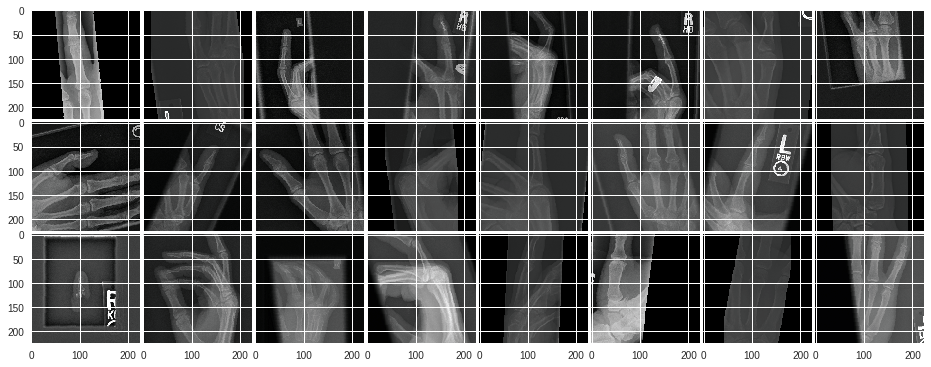

In [132]:
viewimage(image_list,diff)

In [0]:
image_np = image_list.cpu().detach().numpy()

In [0]:
!pip install pycm


In [63]:
from pycm import *
cm = ConfusionMatrix(actual_vector=np.asarray(label_list), predict_vector=np.asarray(pred_list))
#print(cm.classes)
#print(cm.table)
print(cm)

Predict          0        1        
Actual
0                2924     214      
1                316      1652     




Overall Statistics : 

95% CI                                                           (0.88783,0.90457)
Bennett_S                                                        0.7924
Chi-Squared                                                      3102.23858
Chi-Squared DF                                                   1
Conditional Entropy                                              0.46573
Cramer_V                                                         0.77947
Cross Entropy                                                    0.96302
Gwet_AC1                                                         0.80453
Joint Entropy                                                    1.42752
KL Divergence                                                    0.00123
Kappa                                                            0.77876
Kappa 95% CI                                     

In [12]:
print(model_ft)

DenseNet(
  (features): Sequential(
    (conv0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (norm0): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu0): ReLU(inplace)
    (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (denseblock1): _DenseBlock(
      (denselayer1): _DenseLayer(
        (norm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inplace)
        (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (norm2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu2): ReLU(inplace)
        (conv2): Conv2d(128, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      )
      (denselayer2): _DenseLayer(
        (norm1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inplac

## TensorFlow execution

Colaboratory allows you to execute TensorFlow code in your browser with a single click. The example below adds two matrices.

$\begin{bmatrix}
  1. & 1. & 1. \\
  1. & 1. & 1. \\
\end{bmatrix} +
\begin{bmatrix}
  1. & 2. & 3. \\
  4. & 5. & 6. \\
\end{bmatrix} =
\begin{bmatrix}
  2. & 3. & 4. \\
  5. & 6. & 7. \\
\end{bmatrix}$

In [0]:
import tensorflow as tf
import numpy as np

with tf.Session():
  input1 = tf.constant(1.0, shape=[2, 3])
  input2 = tf.constant(np.reshape(np.arange(1.0, 7.0, dtype=np.float32), (2, 3)))
  output = tf.add(input1, input2)
  result = output.eval()

result

array([[ 2.,  3.,  4.],
       [ 5.,  6.,  7.]], dtype=float32)

## Visualization

Colaboratory includes widely used libraries like [matplotlib](https://matplotlib.org/), simplifying visualization.

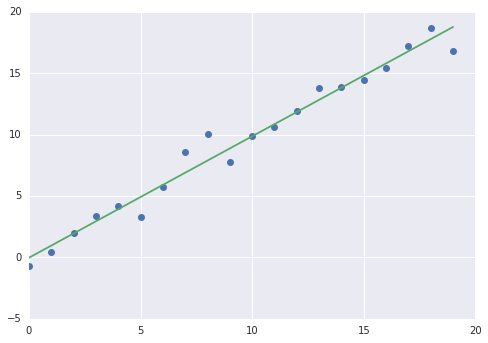

In [0]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(20)
y = [x_i + np.random.randn(1) for x_i in x]
a, b = np.polyfit(x, y, 1)
_ = plt.plot(x, y, 'o', np.arange(20), a*np.arange(20)+b, '-')

Want to use a new library?  `pip install` it. For recipes to import commonly used libraries, refer to the [importing libraries example notebook](/notebooks/snippets/importing_libraries.ipynb)

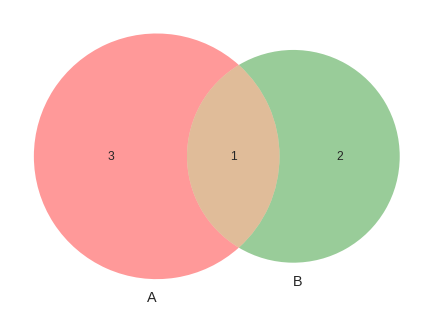

In [0]:
# Only needs to be run once at the top of the notebook.
!pip install -q matplotlib-venn

# Now the newly-installed library can be used anywhere else in the notebook.
from matplotlib_venn import venn2
_ = venn2(subsets = (3, 2, 1))

# Forms

Forms can be used to parameterize code. See the [forms example notebook](/notebooks/forms.ipynb) for more details.

In [0]:
#@title Examples

text = 'value' #@param 
date_input = '2018-03-22' #@param {type:"date"}
number_slider = 0 #@param {type:"slider", min:-1, max:1, step:0.1}
dropdown = '1st option' #@param ["1st option", "2nd option", "3rd option"]


# For more information:
- [Overview of Colaboratory](/notebooks/basic_features_overview.ipynb)
- [Importing libraries and installing dependencies](/notebooks/snippets/importing_libraries.ipynb)
- [Markdown guide](/notebooks/markdown_guide.ipynb)
- [Charts](/notebooks/charts.ipynb)
- [Widgets](/notebooks/widgets.ipynb)
- [Loading and saving data: local files, Drive, Sheets, Google Cloud Storage](/notebooks/io.ipynb)
- [Example Google Cloud BigQuery notebook](/notebooks/bigquery.ipynb)
- [TensorFlow with GPU](/notebooks/gpu.ipynb)
- [Forms](/notebooks/forms.ipynb)